In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText

In [28]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rc('font', family='Helvetica')

In [3]:
decimation_data_comercial = pd.read_csv("Decimation_Comercial.csv")
decimation_data_mmi = pd.read_csv("Decimation_MMI.csv")

pti_inversion_comercial = pd.read_csv("PTI_Inversion_Comercial.csv")
pti_inversion_mmi = pd.read_csv("PTI_Inversion_MMI.csv")

# DC Values

## Comercial Coupler

## MMI Coupler

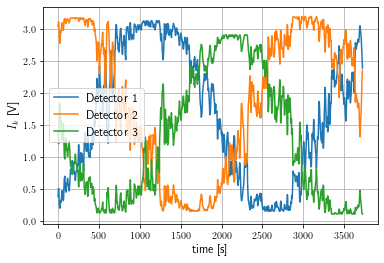

In [4]:
time = np.arange(len(decimation_data_comercial))
for channel in range(1, 4):
    plt.plot(time, decimation_data_comercial[f"DC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("time [s]", fontsize=12)
plt.ylabel("$I_k$ [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

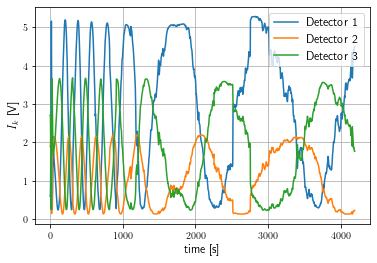

In [5]:
time = np.arange(len(decimation_data_mmi["DC CH1"]))
for channel in range(1, 4):
    plt.plot(time, decimation_data_mmi[f"DC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("time [s]", fontsize=12)
plt.ylabel("$I_k$ [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# RMS Values

## Comercial Coupler

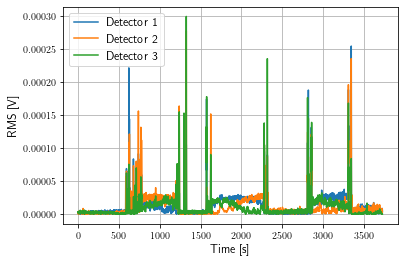

In [6]:
time = np.arange(len(decimation_data_comercial))
for channel in range(1, 4):
    plt.plot(time, decimation_data_comercial[f"AC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("RMS [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## MMI Coupler

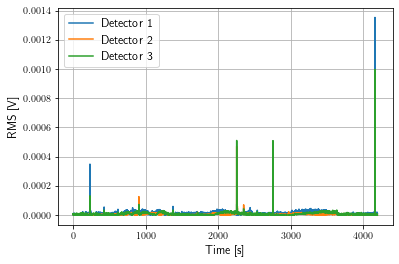

In [7]:
time = np.arange(len(decimation_data_mmi))
for channel in range(1, 4):
    plt.plot(time, decimation_data_mmi[f"AC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("RMS [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# Response Phases

## Comercial Coupler

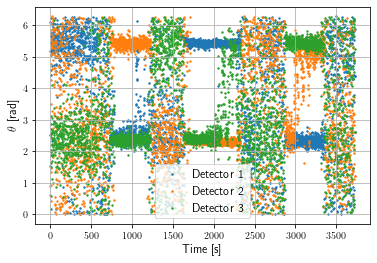

In [8]:
decimation_data_comercial[decimation_data_comercial < 0] += 2 * np.pi
for channel in range(1, 4):
    plt.scatter(range(len(decimation_data_comercial)), decimation_data_comercial[f"AC Phase CH{channel}"], label=f"Detector {channel}", s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\theta$ [rad]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [9]:
response_phase_comercial = []
for channel in range(1, 4):
    response_phase_comercial.append(np.mean(decimation_data_comercial[f"AC Phase CH{channel}"][800:1000]))
response_phase_comercial = np.array(response_phase_comercial)
response_phase_comercial

array([2.4616084 , 5.41029479, 2.35659651])

In [10]:
response_phase_comercial = np.array(response_phase_comercial)
response_phase_comercial[0] += np.pi
response_phase_comercial[2] += np.pi
response_phase_comercial

array([5.60320105, 5.41029479, 5.49818916])

## MMI Coupler

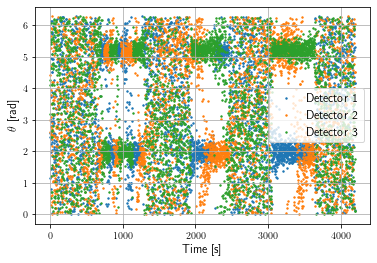

In [11]:
decimation_data_mmi[decimation_data_mmi < 0] += 2 * np.pi
for channel in range(1, 4):
    plt.scatter(range(len(decimation_data_mmi)), decimation_data_mmi[f"AC Phase CH{channel}"], label=f"Detector {channel}", s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\theta$ [rad]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [12]:
response_phase_mmi = []
for channel in range(1, 4):
    response_phase_mmi.append(np.mean(decimation_data_mmi[f"AC Phase CH{channel}"][3050:3350]))
response_phase_mmi = np.array(response_phase_mmi)
response_phase_mmi

array([1.97994273, 5.1734598 , 5.23159043])

In [13]:
response_phase_mmi = np.array(response_phase_mmi)
response_phase_mmi[0] += np.pi
response_phase_mmi

array([5.12153539, 5.1734598 , 5.23159043])

# Interferometric Phase

## Comercial Coupler

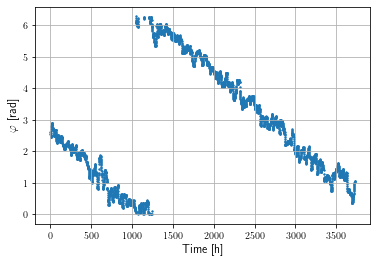

In [14]:
phases_comercial = pti_inversion_comercial["Interferometric Phase"]
plt.scatter(range(len(phases_comercial)), phases_comercial, label="Interferometrio Phase", s=2)
plt.xlabel("Time [h]", fontsize=12)
plt.ylabel(r"$\varphi$ [rad]", fontsize=12)
plt.grid()
plt.show()

## MMI Coupler

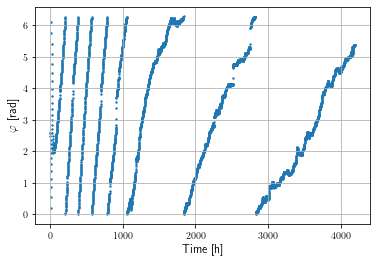

In [15]:
phases_mmi = pti_inversion_mmi["Interferometric Phase"]
plt.scatter(range(len(phases_mmi)), phases_mmi, label="Interferometrio Phase", s=2)
plt.xlabel("Time [h]", fontsize=12)
plt.ylabel(r"$\varphi$ [rad]", fontsize=12)
plt.grid()
plt.show()

# PTI

## Comercial Coupler

In [16]:
pti_comercial = -pti_inversion_comercial["PTI Signal"] * 1e6
pti_mean_comercial_60s = pti_comercial.rolling(60, center=True).mean()

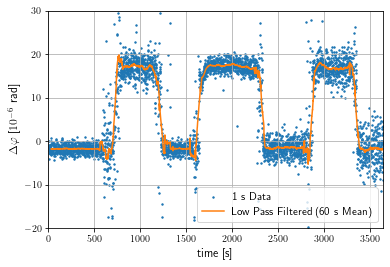

In [17]:
plt.scatter(range(len(pti_comercial)), pti_comercial, s=2, label="1 s Data")
plt.plot(range(len(pti_comercial)), pti_mean_comercial_60s, label="Low Pass Filtered (60 s Mean)", color="tab:orange")
plt.grid()
plt.xlabel("time [s]", fontsize=12)
plt.ylabel(r"$\Delta\varphi$ [$10^{-6}$ rad]", fontsize=12)
plt.legend(fontsize=11)
plt.axis([0, len(pti_comercial) - 80, -20, 30])
plt.show()

## MMI Coupler

In [18]:
pti_mmi = -pti_inversion_mmi["PTI Signal"] * 1e6
pti_mean_mmi_60s = pti_mmi.rolling(60, center=True).mean()

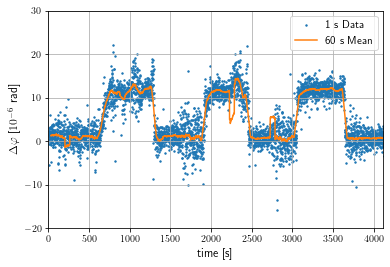

In [19]:
plt.scatter(range(len(pti_mmi)), pti_mmi, s=2, label="1 s Data")
plt.plot(range(len(pti_mmi)), pti_mean_mmi_60s, label="60 s Mean", color="tab:orange")
plt.grid()
plt.axis([0, len(pti_mmi) - 80, -20, 30])
plt.xlabel("time [s]", fontsize=12)
plt.ylabel(r"$\Delta\varphi$ [$10^{-6}$ rad]", fontsize=12)
plt.legend(fontsize=11)
plt.show()

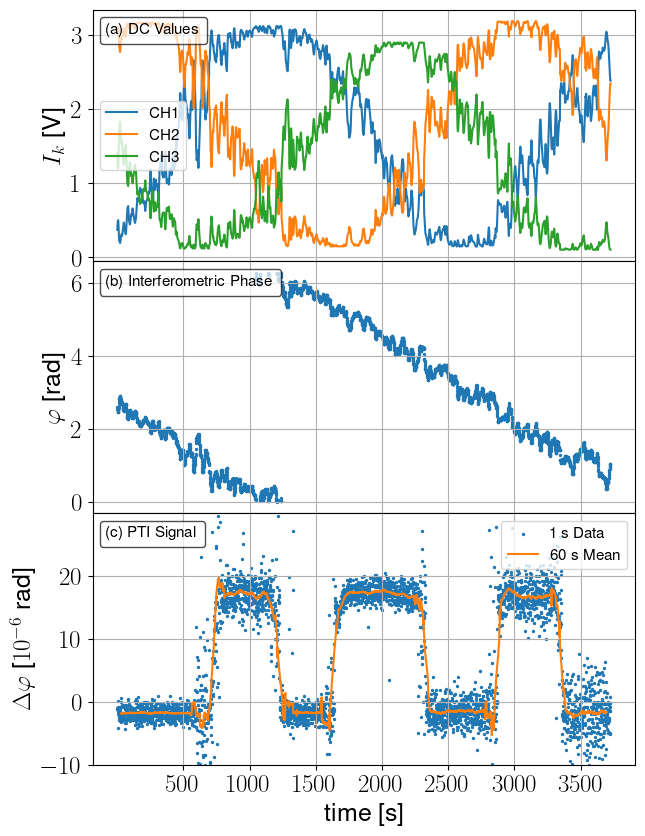

In [41]:
fig=plt.figure(figsize=(7, 10), dpi=100)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

time = range(len(phases_comercial))

ax1.plot(time, decimation_data_comercial["DC CH1"], label="CH1")
ax1.plot(time, decimation_data_comercial["DC CH2"], label= "CH2")
ax1.plot(time, decimation_data_comercial["DC CH3"], label="CH3")

ax2.scatter(time, phases_comercial, s=2)

ax3.scatter(time, pti_comercial, s=2, label="1 s Data")
ax3.plot(time, pti_mean_comercial_60s, label="60 s Mean", color="tab:orange")

at1 = AnchoredText("(a) DC Values", prop=dict(size=11), frameon=True, loc='upper left')
at2 = AnchoredText("(b) Interferometric Phase", prop=dict(size=11), frameon=True, loc='upper left')
at3 = AnchoredText("(c) PTI Signal", prop=dict(size=11), frameon=True, loc='upper left')

at1.patch.set(alpha=0.7)
at1.patch.set_boxstyle('round, pad=0, rounding_size=0.2')
at2.patch.set(alpha=0.7)
at2.patch.set_boxstyle('round, pad=0, rounding_size=0.2')

at3.patch.set(alpha=0.7)
at3.patch.set_boxstyle('round, pad=0, rounding_size=0.2')

ax1.get_shared_x_axes().join(ax1, ax2, ax3)
ax1.set_xticklabels([])
ax1.grid()
ax1.set_ylabel(r"$I_k$ [V]")
ax1.legend(fontsize=11)
ax1.add_artist(at1)
ax1.set_xticks(([500, 1000, 1500, 2000, 2500, 3000, 3500]))

ax2.set_xticklabels([])
ax2.grid()
ax2.set_ylabel(r"$\varphi$ [rad]")
ax2.add_artist(at2)
ax2.set_xticks(([500, 1000, 1500, 2000, 2500, 3000, 3500]))


ax3.grid()
ax3.set_xlabel("time [s]")
ax3.set_ylabel(r"$\Delta \varphi$ [$10^{-6}$ rad]")
ax3.legend(loc="upper right", fontsize=11)
ax3.add_artist(at3)
ax3.set_ylim([-10, 30])
ax3.set_xticks(([500, 1000, 1500, 2000, 2500, 3000, 3500]))
ax3.set_yticks([-10, 0, 10, 20])

plt.subplots_adjust(hspace=.0)

ax2.autoscale()
plt.savefig(fname="comercial.pdf", bbox_inches='tight')

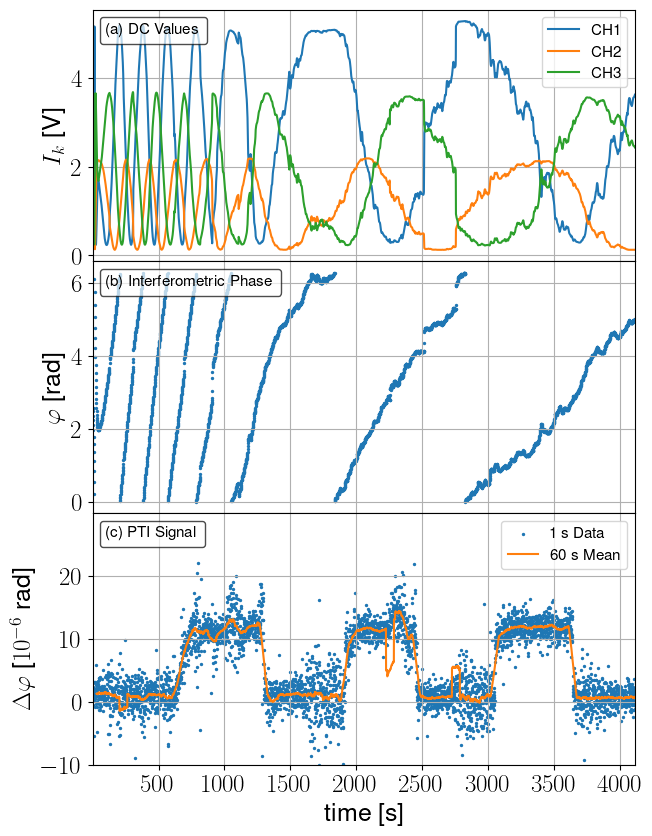

In [37]:
fig_mmi =plt.figure(figsize=(7, 10), dpi=100)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

time = range(len(pti_mmi))

ax1.plot(time, decimation_data_mmi["DC CH1"], label="CH1")
ax1.plot(time, decimation_data_mmi["DC CH2"], label= "CH2")
ax1.plot(time, decimation_data_mmi["DC CH3"], label="CH3")

ax2.scatter(time, phases_mmi, s=2)

ax3.scatter(range(len(pti_mmi)), pti_mmi, s=2, label="1 s Data")
ax3.plot(range(len(pti_mmi)), pti_mean_mmi_60s, label="60 s Mean", color="tab:orange")

at1 = AnchoredText("(a) DC Values", prop=dict(size=11), frameon=True, loc='upper left')
at2 = AnchoredText("(b) Interferometric Phase", prop=dict(size=11), frameon=True, loc='upper left')
at3 = AnchoredText("(c) PTI Signal", prop=dict(size=11), frameon=True, loc='upper left')

at1.patch.set(alpha=0.7)
at1.patch.set_boxstyle('round, pad=0, rounding_size=0.2')
at2.patch.set(alpha=0.7)
at2.patch.set_boxstyle('round, pad=0, rounding_size=0.2')

at3.patch.set(alpha=0.7)
at3.patch.set_boxstyle('round, pad=0, rounding_size=0.2')

ax1.get_shared_x_axes().join(ax1, ax2, ax3)
ax1.set_xticklabels([])
ax1.grid()
ax1.set_ylabel(r"$I_k$ [V]")
ax1.legend(fontsize=11)
ax1.add_artist(at1)
ax1.set_xticks(([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]))

ax2.set_xticklabels([])
ax2.grid()
ax2.set_ylabel(r"$\varphi$ [rad]")
ax2.add_artist(at2)
ax2.set_xticks(([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]))


ax3.grid()
ax3.set_xlabel("time [s]")
ax3.set_ylabel(r"$\Delta \varphi$ [$10^{-6}$ rad]")
ax3.legend(fontsize=11, loc="upper right")
ax3.add_artist(at3)
plt.xlim([0, len(pti_mmi) - 80])
ax3.set_ylim([-10, 30])
ax3.set_xticks(([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]))
ax3.set_yticks([-10, 0, 10, 20])

plt.subplots_adjust(hspace=.0)

ax2.autoscale()
plt.savefig(fname="mmi.pdf", bbox_inches='tight')